### Codsoft
#### TASK-4 : SALES PREDICTION USING PYTHON
#### Author : Nisarga N
#### Batch : November
#### Domain : Data science

#### Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as
#### advertising expenditure, target audience segmentation, and advertising platform selection.

### Importing the Necessary Library

In [2]:
import pandas as pd #data understanding and data handling
import numpy as np #data manipulation

# Data visulazation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

from sklearn.linear_model import Lasso #Lasso algorithm
from sklearn.model_selection import train_test_split #for training and testing the model
from sklearn import metrics # model evalution 

### Importing the dataset

In [3]:
#load the dataset using pandas
df_car_sales=pd.read_csv("C:\\Users\\nithi\\Downloads\\advertising.csv")

#### Data understanding

In [4]:
df_car_sales.head(10) #List the first ten elements o1f the dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [5]:
df_car_sales.shape #total number of rows and columns

(200, 4)

In [6]:
df_car_sales.columns.value_counts()

TV           1
Radio        1
Newspaper    1
Sales        1
dtype: int64

##### basic observation
##### There are 200 Rows and 4 colums

In [7]:
df_car_sales.info() #information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
#statistcal analysis of the dataset
df_car_sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


##### Basic observation
##### TV have  highest average expense
##### Radio have lowest average expense
##### Maximum sales - 27.00 and Minumum Sales - 1.60

In [9]:
#checking for any null values and duplicate values
df_car_sales.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
#duplicate values
df_car_sales.duplicated().sum()

0

##### basic obeservation 
##### there are No null values or duplicate values

### Exploratory Data analysis

In [11]:
df_car_sales.corr() # correlation between columns 

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

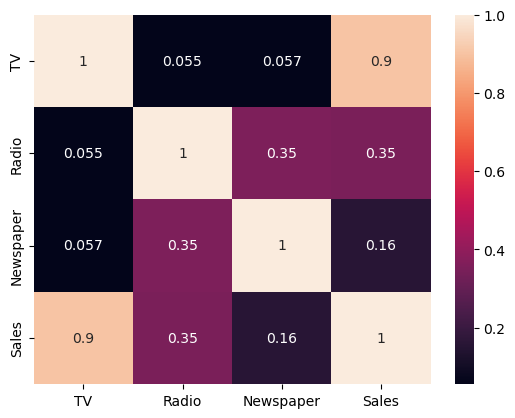

In [13]:
sns.heatmap(df_car_sales.corr(),annot=True)

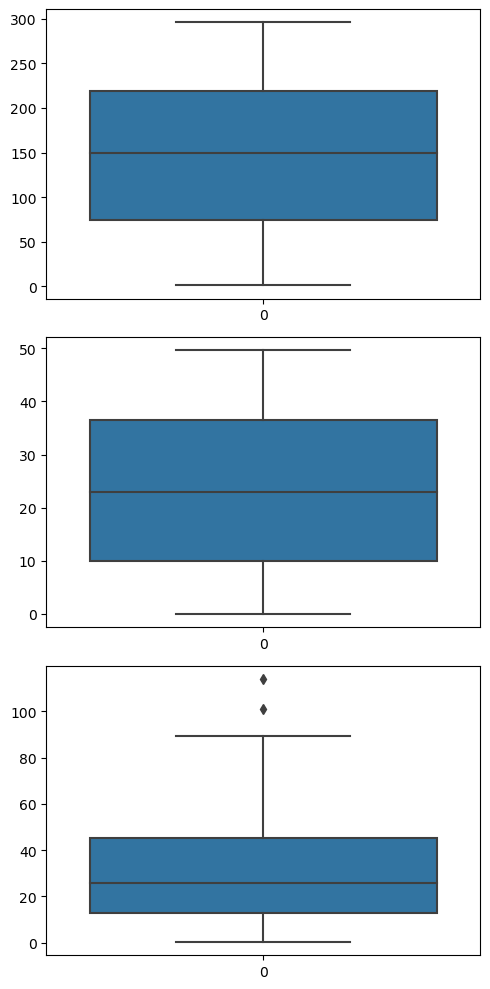

In [12]:
#checking for outliers
fig,axis=plt.subplots(3,figsize=(5,10))
plot1=sns.boxplot(df_car_sales['TV'],ax=axis[0])
plot2=sns.boxplot(df_car_sales['Radio'],ax=axis[1])
plot3=sns.boxplot(df_car_sales['Newspaper'],ax=axis[2])
plt.tight_layout()

#### Analyzing the data using the histplots

<Axes: xlabel='TV', ylabel='Count'>

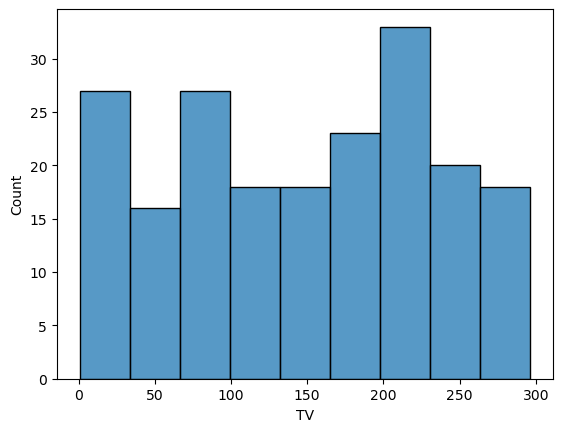

In [13]:
sns.histplot(df_car_sales['TV'])

<Axes: xlabel='Radio', ylabel='Count'>

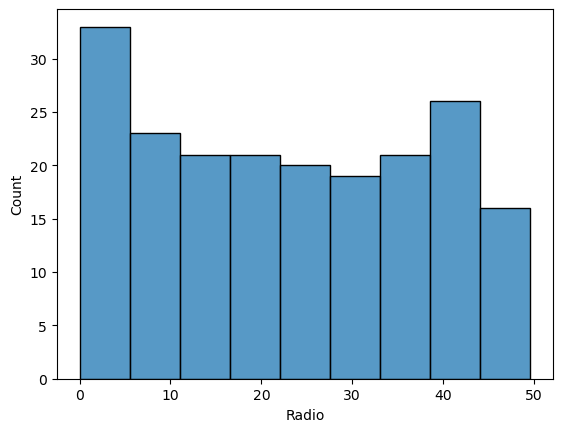

In [15]:
sns.histplot(df_car_sales['Radio'])

<Axes: xlabel='Newspaper', ylabel='Count'>

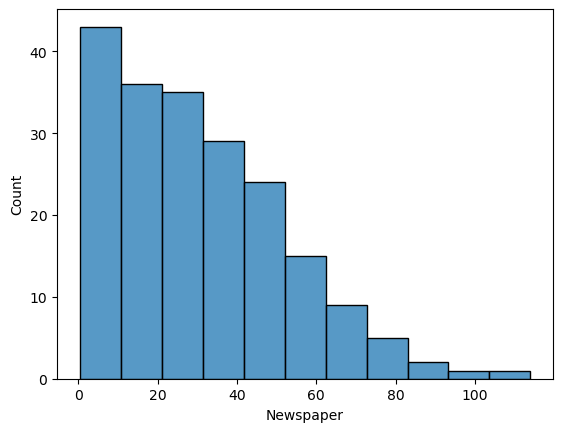

In [14]:
sns.histplot(df_car_sales['Newspaper'])

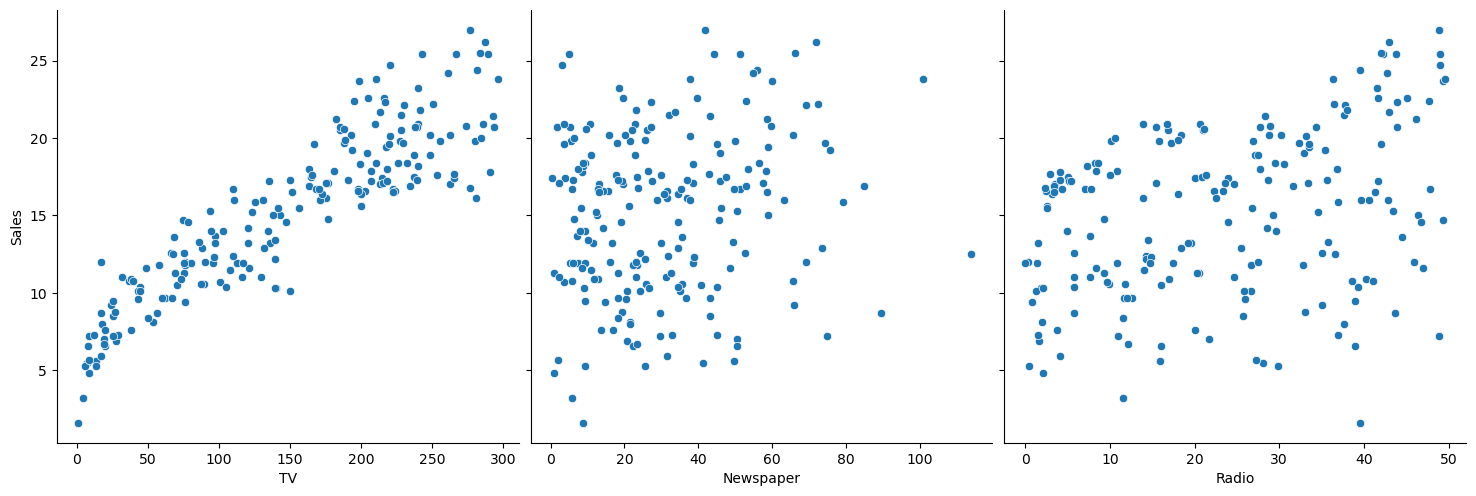

In [16]:
#ploting the pairplot 
sns.pairplot(df_car_sales,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=5,aspect=1,kind='scatter')

##### from this obersvations can be made
##### As ads in TV increases the sales
##### but in the newspaper it's unpredictable

## Model Building

##### split the data for train and test

In [17]:
X=df_car_sales[['TV']]
Y=df_car_sales[['Sales']]
print(X)
print(Y)


        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]
     Sales
0     22.1
1     10.4
2     12.0
3     16.5
4     17.9
..     ...
195    7.6
196   14.0
197   14.8
198   25.5
199   18.4

[200 rows x 1 columns]


In [18]:
df_car_x_train,df_car_x_test,df_car_y_train,df_car_y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(df_car_x_train)
print(df_car_x_test)

        TV
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[160 rows x 1 columns]
        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0


#### Model training

In [19]:
#loading the lasso regression model
df_car_sales_model=Lasso()
df_car_sales_model.fit(df_car_x_train,df_car_y_train)

Lasso()

### model evalution

#### trained data

In [20]:
df_car_sales_training_prediciton=df_car_sales_model.predict(df_car_x_train)
df_car_sales_training_prediciton

array([ 9.18674218,  8.89354981, 14.94199979, 18.5634685 , 18.87837882,
       12.75934549,  7.65019699,  8.10084452, 14.0081278 , 12.86250577,
       13.14483916, 19.64393667, 20.96330233, 17.22238488,  9.61024227,
       10.56583221, 23.08623226, 16.54912833, 18.17797483,  7.57961364,
       21.582264  , 17.9119299 , 19.04669296, 15.18089728, 16.48397447,
       19.00325705, 21.44652679, 16.06047439, 12.63446726, 11.32596058,
       17.22238488, 14.4750638 , 22.04377051, 23.27626435, 12.40642875,
       13.14483916, 21.05017414, 18.26484664, 20.21946243, 17.70017986,
       17.55901316, 12.05351201,  9.51794097,  9.25732553,  7.89452396,
       20.17602653,  8.11713298, 18.62319287,  8.57321   , 16.79345531,
       18.41687231, 10.77215277, 15.311205  , 14.20901887, 12.29783899,
       22.20665516, 22.21751413,  7.60676108, 20.80584717, 16.72287196,
        7.81851113, 11.28252467, 18.03137864, 19.6765136 , 13.01453144,
       19.4430456 , 16.04961541, 14.30132017, 18.41144283, 16.79

In [21]:
# R sqaured error
r2_score=metrics.r2_score(df_car_y_train,df_car_sales_training_prediciton)
print("R squared score : ",r2_score)

R squared score :  0.8134534759453105


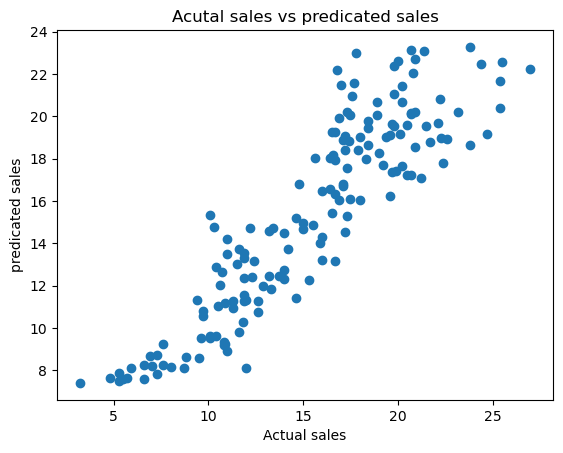

In [22]:
plt.scatter(df_car_y_train,df_car_sales_training_prediciton)
plt.xlabel('Actual sales')
plt.ylabel('predicated sales')
plt.title('Acutal sales vs predicated sales')
plt.show()

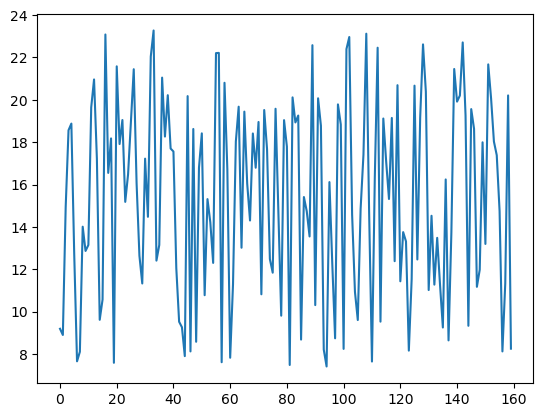

In [36]:
plt.plot(df_car_sales_training_prediciton)

In [24]:
df_car_sales_model.coef_

array([0.05429488])

In [25]:
df_car_sales_model.intercept_

array([7.183261])

In [26]:
0.05429488*36.9+7.183261

9.186742072

### testing data

In [28]:
df_car_sales_testing_prediciton=df_car_sales_model.predict(df_car_x_test)
df_car_sales_testing_prediciton

array([10.94046691,  9.89800515, 12.09151843, 22.91248864, 16.4242501 ,
       10.23463343,  7.65562648, 20.21946243,  8.47547921, 17.9119299 ,
       21.37051396, 11.9177748 , 15.68583969, 17.37984005, 11.33139007,
       13.70950595, 21.60398195,  7.22126741, 11.23908876, 18.76978905,
       22.79846938, 14.8008331 , 16.69029503, 14.3338971 , 10.08803724,
       13.86696111, 16.17449364, 18.31371204, 19.34531481,  8.54606256,
       10.86445407, 17.98251325, 22.42383469, 20.30633425,  7.89995345,
        8.19857531, 10.41923603, 16.99977586, 10.897031  ,  8.54063307])

In [29]:
# r sqaure error for test data
r2_score_1=metrics.r2_score(df_car_y_test,df_car_sales_testing_prediciton)
print("R square score : ",r2_score_1)

R square score :  0.8007688196028298


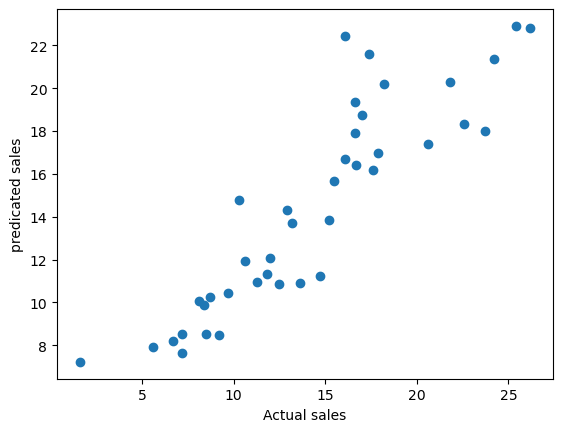

In [37]:
plt.scatter(df_car_y_test,df_car_sales_testing_prediciton)
plt.xlabel('Actual sales')
plt.ylabel('predicated sales')
plt.show()

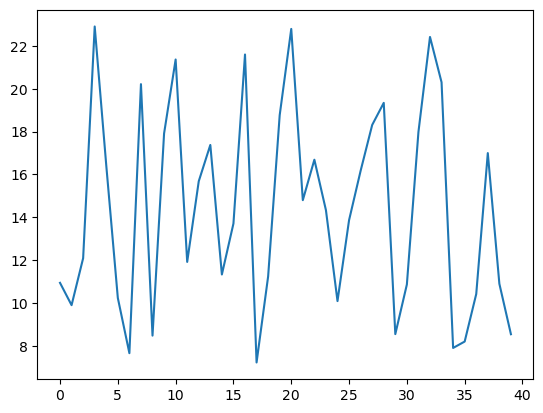

In [38]:
plt.plot(df_car_sales_testing_prediciton)

#### Conclusion

#### The highest sales are coming from the adversting in the TV ads